In [7]:
import astropy
from astropy.io import fits
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['text.usetex'] = True
%matplotlib inline
field = 'gdn'

In [4]:
gcat_gdn = fits.open('/Users/rsimons/Desktop/clear/Catalogs/gabes_cats/gdn-grism-j123656p6215.info.fits')
gcat_gds = fits.open('/Users/rsimons/Desktop/clear/Catalogs/gabes_cats/gds-grism-j033236m2748.info.fits')
    
    
    
    



In [74]:
clear_gdn_fields = ['GN1_lines_grizli.fits', 'GN2_lines_grizli.fits', 'GN3_lines_grizli.fits', 'GN4_lines_grizli.fits', 'GN5_lines_grizli.fits', 'GN7_lines_grizli.fits']
clear_gds_fields = ['GS1_lines_grizli.fits', 'GS2_lines_grizli.fits', 'GS3_lines_grizli.fits', 'GS4_lines_grizli.fits', 'GS5_lines_grizli.fits']
#clear_gdn_fields = ['GN1_lines_grizli.fits']




lines = ['Ha', 'Hb', 'OII', 'OIII']
clrs = ['red', 'green', 'blue', 'orange']

    
flux_compare = {}
for fld in ['GDN', 'GDS']:
    for line in lines:
        flux_compare[fld + '_'+ line+'_g'] = []
        flux_compare[fld + '_'+ 'e'+line+'_g'] = []
        flux_compare[fld + '_'+ line+'_c'] = []
        flux_compare[fld + '_'+ 'e'+line+'_c'] = []

    flux_compare[fld + '_' + 'z50_g'] = []
    flux_compare[fld + '_' + 'z16_g'] = []
    flux_compare[fld + '_' + 'z84_g'] = []
    flux_compare[fld + '_' + 'z50_c'] = []
    flux_compare[fld + '_' + 'z16_c'] = []
    flux_compare[fld + '_' + 'z84_c'] = []


for ax, fld, gcat, clear_field in zip([ax1, ax2], ['GDN', 'GDS'], [gcat_gdn, gcat_gds], [clear_gdn_fields, clear_gds_fields]):
    print (clear_field)
    gra = gcat[1].data['ra']
    gdec = gcat[1].data['dec']
    
    for cl_field  in clear_field:
        ccat = fits.open('/Users/rsimons/Desktop/clear/Catalogs/grizli_v2.1_cats/' + cl_field)
        cra = ccat[1].data['RA']
        cdec = ccat[1].data['DEC']

        for i, di in enumerate(ccat[1].data['ID']):
            dist = np.sqrt((gra - cra[i])**2. + (gdec - cdec[i])**2.) * 3600.
            gd = np.argmin(dist)
            #gd = np.where(gcat[1].data['id'] == di)[0]
            #if fld == 'GDS': print (dist[gd])
            if dist[gd] < 1.:
                for l, line in enumerate(lines):                    
                    flux_compare[fld + '_' + line+'_g'].append(gcat[1].data['flux_{}'.format(line)][gd])
                    flux_compare[fld + '_' + 'e'+line+'_g'].append(gcat[1].data['err_{}'.format(line)][gd])
                    flux_compare[fld + '_' + line+'_c'].append(ccat[1].data['{}_FLUX'.format(line)][i] * 1.e-17)
                    flux_compare[fld + '_' + 'e'+line+'_c'].append(ccat[1].data['{}_FLUX_ERR'.format(line)][i] * 1.e-17)
                    flux_compare[fld + '_' + 'z50_c'].append(gcat[1].data['z50'][gd])
                    flux_compare[fld + '_' + 'z16_c'].append(gcat[1].data['z16'][gd])
                    flux_compare[fld + '_' + 'z84_c'].append(gcat[1].data['z84'][gd])                    
                    flux_compare[fld + '_' + 'z50_g'].append(ccat[1].data['z_50'][i])
                    flux_compare[fld + '_' + 'z16_g'].append(ccat[1].data['z_16'][i])
                    flux_compare[fld + '_' + 'z84_g'].append(ccat[1].data['z_84'][i])


                
                    
                    
                    
    


['GN1_lines_grizli.fits', 'GN2_lines_grizli.fits', 'GN3_lines_grizli.fits', 'GN4_lines_grizli.fits', 'GN5_lines_grizli.fits', 'GN7_lines_grizli.fits']
['GS1_lines_grizli.fits', 'GS2_lines_grizli.fits', 'GS3_lines_grizli.fits', 'GS4_lines_grizli.fits', 'GS5_lines_grizli.fits']


/anaconda2/envs/grizli/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: divide by zero encountered in true_divide
/anaconda2/envs/grizli/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in true_divide
/anaconda2/envs/grizli/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater


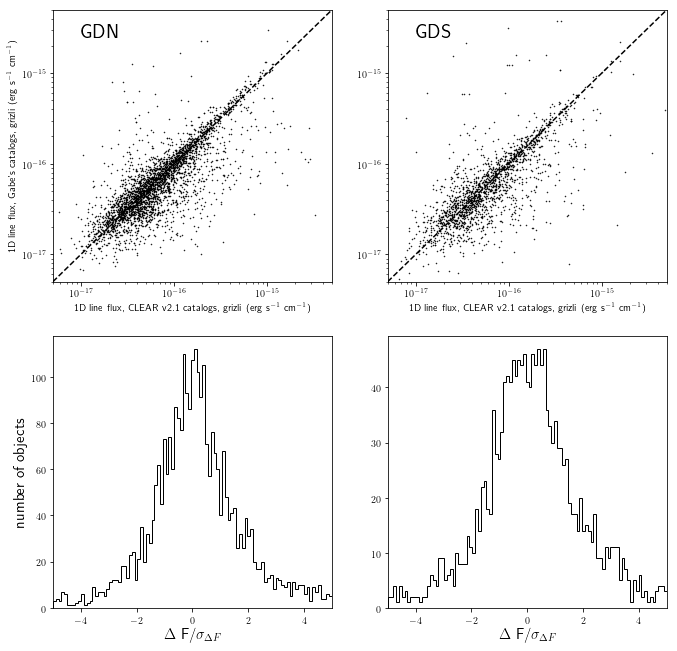

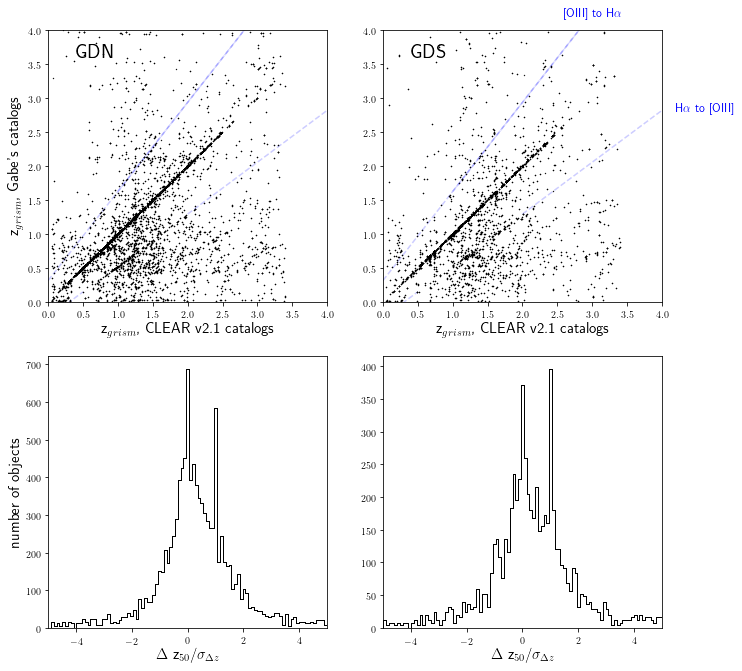

In [157]:
fig1, axes1 = plt.subplots(2,2, figsize = (11, 11))
fig2, axes2 = plt.subplots(2,2, figsize = (11, 11))


    
for f, fld in enumerate(['GDN', 'GDS']):    
    ax1 = axes1[0, f]
    ax2 = axes2[0, f]

    ax1.set_xscale('log')
    ax1.set_yscale('log')

    ax1.set_ylim(5.e-18, 5.e-15)
    ax1.set_xlim(5.e-18, 5.e-15)
    ax1.set_xlabel(r'1D line flux, CLEAR v2.1 catalogs, grizli (erg s$^{-1}$ cm$^{-1}$)')
    ax2.set_xlabel(r'z$_{grism}$, CLEAR v2.1 catalogs', fontsize = 15)

        
    ax2.set_xlim(0,4)
    ax2.set_ylim(0,4)
    
    ax1.plot([5.e-18, 1.e-14], [5.e-18, 1.e-14], 'k--')

    
    ax1_h = axes1[1,f]
    ax2_h = axes2[1,f]
    
    ax1_h.set_xlim(-5, 5)
    ax1_h.set_xlabel(r'$\Delta$ F/$\sigma_{\Delta F}$', fontsize = 15)    
    ax2_h.set_xlim(-5, 5)
    ax2_h.set_xlabel(r'$\Delta$ z$_{50}$/$\sigma_{\Delta z}$', fontsize = 15)
    if f == 0:
        ax1.set_ylabel(r"1D line flux, Gabe's catalogs, grizli (erg s$^{-1}$ cm$^{-1}$)")
        ax1_h.set_ylabel("number of objects", fontsize = 15)
    if f == 0:
        ax2.set_ylabel(r"z$_{grism}$, Gabe's catalogs", fontsize = 15)
        ax2_h.set_ylabel("number of objects", fontsize = 15)

    ax1.annotate(fld, (0.1, 0.9), xycoords = 'axes fraction', fontsize = 20)
    ax2.annotate(fld, (0.1, 0.9), xycoords = 'axes fraction', fontsize = 20)
    flux_rat = np.array([])
    for l, line in enumerate(lines):
        flux_c  = np.array(flux_compare[fld + '_' + line+'_c'])
        flux_g  = np.array(flux_compare[fld + '_' + line+'_g'])
        eflux_c = np.array(flux_compare[fld + '_' + 'e'+line+'_c'])
        eflux_g = np.array(flux_compare[fld + '_' + 'e'+line+'_g'])

        z50_c  = np.array(flux_compare[fld + '_' + 'z50_c'])
        z50_g  = np.array(flux_compare[fld + '_' + 'z50_g'])
        e50_c = np.array(z50_c) - np.array(flux_compare[fld + '_' + 'z16_c'])
        e50_g =  np.array(z50_g) - np.array(flux_compare[fld + '_' + 'z16_g'])
        
        
        #SN_lim = 5.
        gd = np.where((flux_c/eflux_c > 2.) & (flux_g/eflux_g > 2.))
        gd2 = np.where((z50_c > 0.) & (z50_g > 0.) & (e50_g < 0.5) & (e50_g < 0.5))[0]

        ax1.plot(flux_c[gd], flux_g[gd],'.', color = 'k', markersize = 1, alpha = 1.0)
        flux_rat = np.concatenate((flux_rat, (flux_c[gd] - flux_g[gd])/np.sqrt(eflux_c[gd]**2. + eflux_g[gd]**2.)))
        ax2.plot(z50_c[gd2], z50_g[gd2],'.', color = 'k', markersize = 0.1, alpha = 1.0)
        zcheck = np.linspace(2,5, 1000)
        zcheck2 = np.linspace(1,5, 1000)
        ax2.plot(zcheck2, (1+zcheck2)*6563./5007. - 1.,'b--', alpha = 0.05)
        ax2.plot(zcheck, (1+zcheck)*5007./6563. - 1.,'b--', alpha = 0.05)

        zcheck = np.linspace(0,0.5, 1000)
        zcheck2 = np.linspace(0,5, 1000)
        ax2.plot(zcheck2, (1+zcheck2)*6563./5007. - 1.,'b--', alpha = 0.05)
        ax2.plot(zcheck, (1+zcheck)*5007./6563. - 1.,'b--', alpha = 0.05)
        
        
        ax2.plot(z50_c, z50_g,'.', color = 'k', markersize = 0.1, alpha = 1.0)
        ax2_h.hist((z50_c[gd2] - z50_g[gd2])/(np.sqrt(e50_c[gd2]**2. + e50_g[gd2]**2.)), color = 'black', histtype = 'step', bins = np.linspace(-5,5,100))
    if f == 1:
        ax2.annotate(r"H$\alpha$ to [OIII]", (1.05, 0.70), xycoords = 'axes fraction', color = 'blue', fontweight = 'bold', fontsize = 12)
        ax2.annotate(r"[OIII] to H$\alpha$", (0.65, 1.05), xycoords = 'axes fraction', color = 'blue', fontweight = 'bold', fontsize = 12)

    ax1_h.hist(np.array(flux_rat), color = 'black',  histtype = 'step', bins = np.linspace(-5,5,100))
        
        

    
fig1.savefig('/Users/rsimons/Desktop/clear/figures/grizli_fluxes_comparison.png', dpi = 300)
fig2.savefig('/Users/rsimons/Desktop/clear/figures/grizli_redshifts_comparison.png', dpi = 300)


    

In [94]:
z50_c[gd2].min()

0.05066032725307832

(array([5412., 3220.,  688.,  184.,   20.,    8.,    0.,   16.,   16.,
           8.]),
 array([8.41391210e-03, 1.15314414e+00, 2.29787437e+00, 3.44260460e+00,
        4.58733482e+00, 5.73206505e+00, 6.87679528e+00, 8.02152551e+00,
        9.16625574e+00, 1.03109860e+01, 1.14557162e+01]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

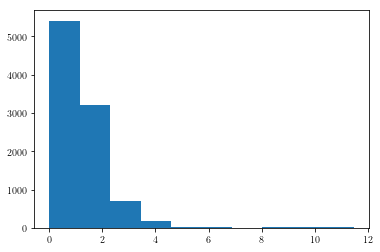

In [104]:
plt.figure()
fig, ax = plt.subplots(1,1)
ax.hist(z50_g[gd2])